# Metropolis-Hastings Algorithm

In [23]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns

#### let y be percentage change in personale on previous year for 10 companies $y_{i}$, and given mean $\mu$ is iid from normal distribution with mean $\mu$ and standard deviation 1. Our prior distribution on $\mu$ is a t distribution with location 0, scale 1 and 1 degree of freedom (aka Cauchy distribution).

$$y_{i} | \mu \sim  N(\mu, 1) $$
$$ \mu \sim t(0, 1, 1) $$

#### Since the model is not conjugation the posterior does not have standard form that we can easily sample, therefore to get posterior samples we need to set up a Markov chain whose stationary distribution is the posterior distribute we want. The posterior distribution is as follows:

$$p(\mu | y_{1},...y_{n}) \propto  exp[n(\hat yn - \mu^2/2)]/(1+\mu^2)$$

#### Let RHS be $g(\mu)$ and evaluate on the log scale:
$$log(g(\mu)) = n(\hat y\mu - \mu^2/2) - log(1+\mu^2)$$


#### Setting out the Metropolis-Hastings Algo.
##### 1. Select an initial value $\theta_{0}$
#### 2. For $i = 1, ...., m $, repeat the following steps:
####       a) Draw a candidate sample $\theta{*}$ from a proposal distribution $q(\theta{*}|\theta_{i-1})$
####       b) Compute the ratio
$$ \alpha = g(\theta{*})q(\theta_{i-1}|\theta{*}) / g(\theta_{-1})q(\theta{*}|\theta_{i-1})$$
####      c) if $\alpha \geq $ then set $\theta_{i} = \theta{*}$. If $\alpha < 1$ then set  $\theta_{i} = \theta{*}$ with proability $\alpha$ or $\theta_{i} = \theta_{i-1}$ with probabiltiy $1-\alpha$.


#### For the below note that the candidate distribution for the standard deviation is normal and therefore symmetric, hence the q() terms cancel

In [4]:
def lg(y_bar, n, mu):
    return n*(y_bar*mu-(mu**2/2.0)) - np.log(1.0 + mu**2)

In [40]:
def mh(n, y_bar, n_iters, mu0, candidate_sd):
    #step 1
    mu_out = np.zeros(n_iters)
    accept = 0
    mu_now = mu0
    lg_now = lg(y_bar, n, mu_now)
    
    #step 2
    
    for i in range(1, n_iters):
        mu_cand = np.random.normal(loc=mu_now, scale=candidate_sd, size=1)
        # for numerical stability the log scale is used
        lg_cand = lg(y_bar=y_bar, n=n, mu=mu_cand)
        lg_alpha = lg_cand - lg_now
        alpha = np.exp(lg_alpha)
        
        u = np.random.uniform(0,1)
        if u < alpha:
            mu_now = mu_cand
            accept += 1
            lg_now = lg_cand
        
        mu_out[i] = mu_now
    
    return mu_out, accept/n_iters    

## Problem set up

In [31]:
y = np.array([1.2, 1.4, -0.5, 0.3, 0.9, 2.3, 1.0, 0.1, 1.3, 1.9])
y_bar = np.mean(y)
n = len(y)

In [21]:
s = y/sum(y)

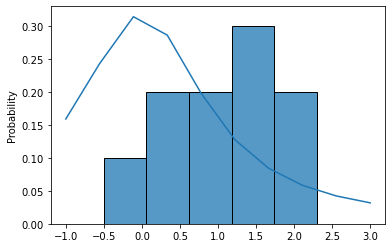

In [60]:
sns.histplot(y, stat='probability')
x = np.linspace(-1,3, 10)
plt.plot(x,stats.t.pdf(x, df=1))

## Posterior sampling

In [44]:
post, acc = mh(n=n, y_bar=y_bar, n_iters=1_000, mu0=0.0, candidate_sd=3.0)

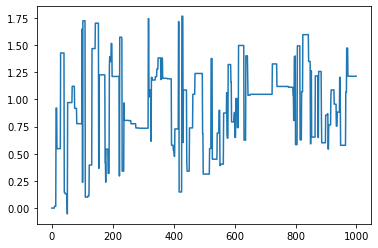

In [46]:
plt.plot(post)

In [47]:
acc

0.131

#### Acceptance rate on the low slide and the trace plot doesn't seem to indicate convergence

In [48]:
post, acc = mh(n=n, y_bar=y_bar, n_iters=1_000, mu0=0.0, candidate_sd=0.05)

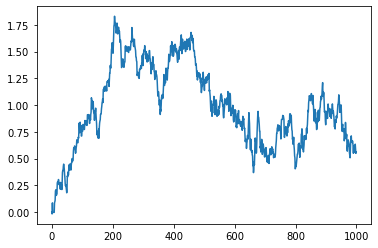

In [49]:
plt.plot(post)

In [50]:
acc

0.93

### reducing the variability in the candidate SD increases the acceptance rate. This rate is now too high. The step sizes are too small and there means it will take the chain a long time to explore the distribution.

In [51]:
post, acc = mh(n=n, y_bar=y_bar, n_iters=1_000, mu0=0.0, candidate_sd=0.9)

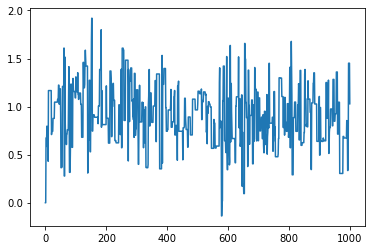

In [53]:
plt.plot(post)

In [54]:
acc

0.366

### usually want an acceptance rate between 0.23 and 0.5. The trace plot now looks a lot better.

In [55]:
post, acc = mh(n=n, y_bar=y_bar, n_iters=1_000, mu0=30.0, candidate_sd=0.9)

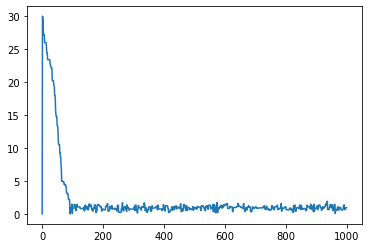

In [56]:
plt.plot(post)

In [ ]:
sns.histplot(y, stat='probability')
x = np.linspace(-1,3, 10)
plt.plot(x,stats.t.pdf(x, df=1))

In [64]:
mu_keep = post[100:]

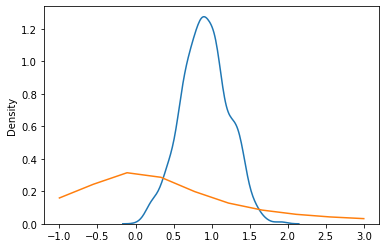

In [69]:
# plot our posterior and prior
sns.kdeplot(mu_keep)
plt.plot(x,stats.t.pdf(x, df=1))